# CS229, Fall 2017
## Problem Set 3: Deep Learning & Unsupervised Learning

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 3 is here: [ps3](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%203/ps3.pdf)

This notebook contains the solution for __Question 5: K-means for compression__

### Quesion 5.a)

In [1]:
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [2]:
A = imread('data\mandrill-large.tiff')

In [3]:
A

array([[[164, 150,  71],
        [ 63,  57,  31],
        [ 75,  43,  10],
        ...,
        [117, 119,  68],
        [141, 170, 101],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  33],
        [ 55,  35,  23],
        ...,
        [122, 140,  98],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 99,  74,  31],
        [132, 118,  46],
        [ 60,  41,  36],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  49]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [117, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  84,  68],
        [ 99,  69,  86],
        [ 80,  63,  71]],

       [[  9,  11,  12],
        [ 10,  12,  11],
        [ 11,  15,  12],
        ...,
        [  5,   8,   5],
        [  2,   5,   0],
        [  4,   5,   2]]

In [4]:
# rgb vector
A[1,1,:]

array([135,  97,  33], dtype=uint8)

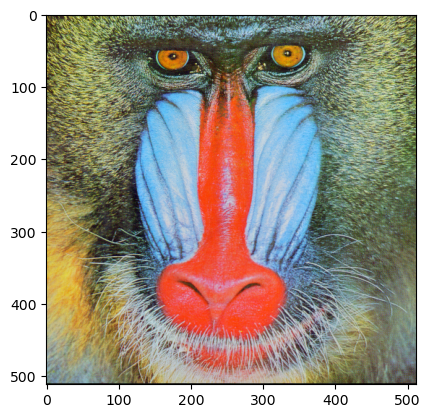

In [5]:
plt.imshow(A)
plt.show()

### Question 5.b)

In [6]:
X = imread('data\mandrill-small.tiff')

In [7]:
flatten_X = X.reshape(-1, X.shape[-1])
flatten_X.shape

(16384, 3)

In [8]:
def kmeans(x, k):
    centroids = np.array([x[i] for i in np.random.randint(0, x.shape[0], k)])
    centroid_id = np.zeros(x.shape[0])
    num_iteration = 0
    centroid_change = 99999999
    final_im = np.empty(x.shape)
    
    while centroid_change > 1e-5:
        for i in range(x.shape[0]):
            distances = np.sum((x[i] - centroids)**2, axis = 1)
            min_id = np.argsort(distances)[0]
            centroid_id[i] = min_id
            
        old_centroids = copy.deepcopy(centroids)
        for c in range(k):
            new_centroid = np.mean([x[i] for i in range(x.shape[0]) if centroid_id[i] == c], axis = 0)
            centroids[c] = new_centroid
        centroid_change = np.sum((centroids - old_centroids)**2)
        num_iteration += 1
        
    for i in range(x.shape[0]):
        cid = int(centroid_id[i])
        final_im[i] = centroids[cid]
    
    return centroids, final_im, num_iteration, centroid_change

In [9]:
centroids, final_im, num_iteration, last_centroid_change = kmeans(flatten_X / 255, 16) 

centroids

array([[0.46193995, 0.7229516 , 0.89755139],
       [0.46947566, 0.49703955, 0.37368638],
       [0.63199332, 0.64358782, 0.52312057],
       [0.59668231, 0.58758049, 0.37182509],
       [0.79757097, 0.65159497, 0.27950688],
       [0.21952576, 0.21284086, 0.17104879],
       [0.86190985, 0.40379424, 0.39224344],
       [0.40222055, 0.57488688, 0.72115804],
       [0.61978529, 0.7561707 , 0.86874989],
       [0.36481385, 0.45400351, 0.47660362],
       [0.36971623, 0.40815248, 0.32378029],
       [0.30571859, 0.32564226, 0.25269699],
       [0.69478894, 0.66663268, 0.66235846],
       [0.92859308, 0.30615421, 0.1849668 ],
       [0.53408838, 0.44199005, 0.22860404],
       [0.49796517, 0.56256146, 0.52288964]])

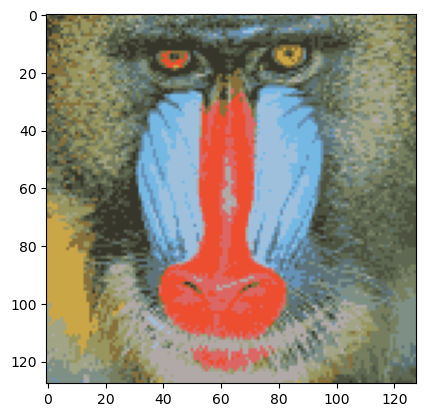

In [10]:
final_im = final_im.reshape(X.shape)
plt.imshow(final_im)
plt.show()

### Question 5.c)

In [11]:
flatten_A = A.reshape(-1, A.shape[-1]) / 255
centroids, final_im, num_iteration, last_centroid_change = kmeans(flatten_A, 16)

centroids

array([[0.62534239, 0.49195538, 0.23185934],
       [0.41394364, 0.51236371, 0.52227069],
       [0.39200093, 0.58980651, 0.75430358],
       [0.78204965, 0.68750125, 0.32127501],
       [0.56134124, 0.64598155, 0.62228482],
       [0.27433106, 0.27900729, 0.21700794],
       [0.31823662, 0.38361987, 0.36841419],
       [0.5967672 , 0.61276539, 0.44404998],
       [0.45793678, 0.49042983, 0.36400445],
       [0.73482893, 0.71213357, 0.61524407],
       [0.93003146, 0.30133653, 0.17335103],
       [0.88070751, 0.4092154 , 0.40910563],
       [0.68923579, 0.76906858, 0.82741164],
       [0.40557707, 0.38149925, 0.23379176],
       [0.50240524, 0.73778283, 0.89878909],
       [0.17948475, 0.15881023, 0.14585564]])

In [12]:
num_iteration

48

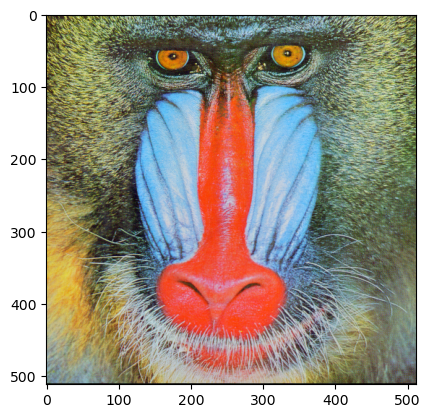

In [13]:
plt.imshow(A)
plt.show()

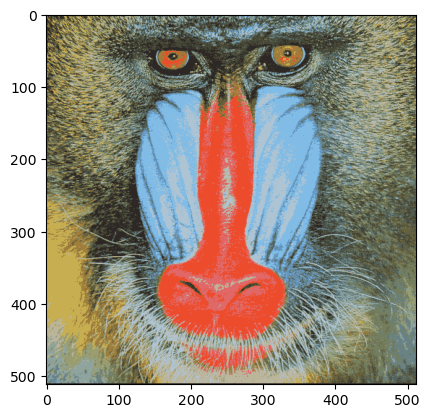

In [14]:
final_im = final_im.reshape(A.shape)
plt.imshow(final_im)
plt.show()

In [16]:
imsave('data.\compressed_im.png', final_im)

### Question 5.d)

If we represent the image with these reduced colors, we compressed the data by $\frac{512^2}{16^2} = 1024$ times